# Week 2 Homework

***Due (pushed to your GitHub branch) on 9/27 by 11:59 pm***

Retrieve and decompress the genome.

In [1]:
!mkdir beegenome
%cd beegenome
!wget -nc -O genome.fa.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003/254/395/GCF_003254395.2_Amel_HAv3.1/GCF_003254395.2_Amel_HAv3.1_genomic.fna.gz
!gzip -d -f genome.fa.gz

/data/users/waldhacw6865/BIOL343/2_genome_exploration/beegenome
--2024-09-26 15:41:58--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003/254/395/GCF_003254395.2_Amel_HAv3.1/GCF_003254395.2_Amel_HAv3.1_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov... 130.14.250.11, 130.14.250.10, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69726867 (66M) [application/x-gzip]
Saving to: ‘genome.fa.gz’

genome.fa.gz        100%[===================>]  66.50M  46.8MB/s    in 1.4s    

2024-09-26 15:42:00 (46.8 MB/s) - ‘genome.fa.gz’ saved [69726867/69726867]



Retrieve and decompress the annotations.

In [4]:
%cd beegenome
!wget -O genome_annotations.gtf.gz https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003/254/395/GCF_003254395.2_Amel_HAv3.1/GCF_003254395.2_Amel_HAv3.1_genomic.gtf.gz
!gzip -f -d genome_annotations.gtf.gz

/data/users/waldhacw6865/BIOL343/2_genome_exploration/beegenome
--2024-09-26 15:52:43--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003/254/395/GCF_003254395.2_Amel_HAv3.1/GCF_003254395.2_Amel_HAv3.1_genomic.gtf.gz
Resolving ftp.ncbi.nlm.nih.gov... 130.14.250.7, 130.14.250.10, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6521081 (6.2M) [application/x-gzip]
Saving to: ‘genome_annotations.gtf.gz’

genome_annotations. 100%[===================>]   6.22M  23.0MB/s    in 0.3s    

2024-09-26 15:52:43 (23.0 MB/s) - ‘genome_annotations.gtf.gz’ saved [6521081/6521081]



Count the number of contigs/chromosomes using a single `grep` command. The command should return an integer.

In [13]:
!grep ">" --count genome.fa

177


List the name of each contig/chromosome, which is included in the header of each sequence. Your `grep` command should return the entire header of each entry, with a new line separating entries.

In [14]:
!grep ">" genome.fa

>NC_037638.1 Apis mellifera strain DH4 linkage group LG1, Amel_HAv3.1, whole genome shotgun sequence
>NC_037639.1 Apis mellifera strain DH4 linkage group LG2, Amel_HAv3.1, whole genome shotgun sequence
>NW_020555788.1 Apis mellifera strain DH4 linkage group LG2 unlocalized genomic scaffold, Amel_HAv3.1 GroupUN_55_associated_to_Group2, whole genome shotgun sequence
>NC_037640.1 Apis mellifera strain DH4 linkage group LG3, Amel_HAv3.1, whole genome shotgun sequence
>NC_037641.1 Apis mellifera strain DH4 linkage group LG4, Amel_HAv3.1, whole genome shotgun sequence
>NC_037642.1 Apis mellifera strain DH4 linkage group LG5, Amel_HAv3.1, whole genome shotgun sequence
>NW_020555789.1 Apis mellifera strain DH4 linkage group LG5 unlocalized genomic scaffold, Amel_HAv3.1 GroupUN_168_associated_to_Group5, whole genome shotgun sequence
>NC_037643.1 Apis mellifera strain DH4 linkage group LG6, Amel_HAv3.1, whole genome shotgun sequence
>NW_020555790.1 Apis mellifera strain DH4 linkage group LG6 unl

Using piped command line tools, list the feature types in the annotations file with the tally of each feature printed next to it.

In [34]:
!cut -f 3  genome_annotations.gtf | sort --dictionary-order | uniq --count

      1 ###
      1 #!annotation-source NCBI Apis mellifera Annotation Release 104
 226407 CDS
 267813 exon
  12398 gene
      1 #!genome-build-accession NCBI_Assembly:GCF_003254395.2
      1 #!genome-build Amel_HAv3.1
      1 #gtf-version 2.2
  23515 start_codon
  23475 stop_codon
  28368 transcript


Select a gene of interest.

*Gene of interest: LOC551580

Using piped command line tools, count the number of exons in your gene of interest.

In [22]:
!grep 'XR_001705490.2' genome_annotations.gtf | cut -f 3,4 | grep 'exon' --count

5


In [23]:
!grep '"XR_001705490.2' genome_annotations.gtf

NC_037638.1	Gnomon	transcript	9274	12174	.	-	.	gene_id "LOC551580"; transcript_id "XR_001705490.2"; db_xref "GeneID:551580"; gbkey "misc_RNA"; gene "LOC551580"; model_evidence "Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 65 samples with support for all annotated introns"; product "ubiquitin-related modifier 1, transcript variant X2"; transcript_biotype "transcript"; 
NC_037638.1	Gnomon	exon	11579	12174	.	-	.	gene_id "LOC551580"; transcript_id "XR_001705490.2"; db_xref "GeneID:551580"; gene "LOC551580"; model_evidence "Supporting evidence includes similarity to: 100% coverage of the annotated genomic feature by RNAseq alignments, including 65 samples with support for all annotated introns"; product "ubiquitin-related modifier 1, transcript variant X2"; transcript_biotype "transcript"; exon_number "1"; 
NC_037638.1	Gnomon	exon	11054	11121	.	-	.	gene_id "LOC551580"; transcript_id "XR_001705490.2"; db_xref "Gene

In [24]:
!samtools faidx genome.fa

*Copy/paste a screenshot of your gene of interest shown in JBrowse2*:

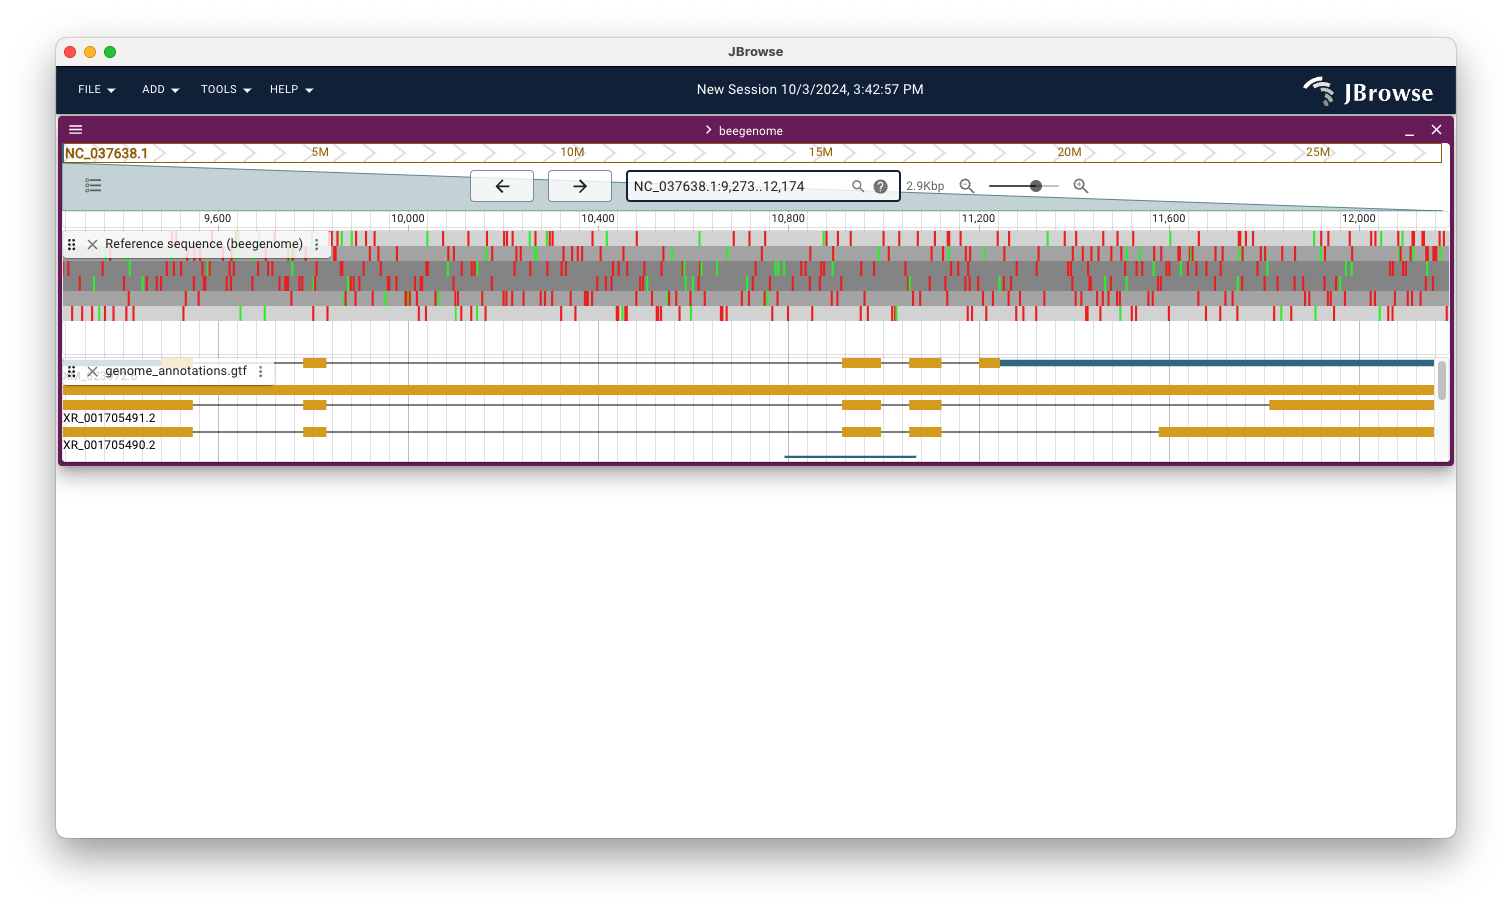